In [1]:
import psycopg2
import pandas as pd
from web_app.psql_secrets import psql_params

In [2]:
conn = psycopg2.connect(**psql_params)
curr = conn.cursor()

curr.execute("SELECT name, author, editorial, price, review, description, five_stars, four_stars, "
			 "three_stars, two_stars, one_star, link, website FROM books")
tuples = curr.fetchall()

df = pd.DataFrame(tuples, columns=["name", "author", "editorial", "price", "review",
								   "description", "five_stars", "four_stars", "three_stars",
								   "two_stars", "one_star", "link", "website"])
indexes = pd.Series(df.index, index=df["link"])

curr.close()
conn.close()

In [3]:
df.head()

,name,author,editorial,price,review,description,five_stars,four_stars,three_stars,two_stars,one_star,link,website
0,fleur. mi desesperada decision,ariana godoy,montena,13500,"una noche es suficiente para cambiar tu vida, ...",formatolibro fisico autor ariana godoy editori...,100% (7),0% (0),0% (0),0% (0),0% (0),https://www.buscalibre.cl/libro-fleur-mi-deses...,1
1,nutricion emocional,fran sabal,planeta,10430,?por que el crecimiento personal es clave a la...,formatolibro fisico autor fran sabal editorial...,94% (76),5% (4),1% (1),0% (0),0% (0),https://www.buscalibre.cl/libro-nutricion-emoc...,1
2,una corte de rosas y espinas,sarah j. maas,planeta,13930,quito una vida. ahora tiene que pagar con su p...,formatolibro fisico autor sarah j. maas editor...,75% (6),25% (2),0% (0),0% (0),0% (0),https://www.buscalibre.cl/libro-una-corte-de-r...,1
3,ojos que no ven,carmen gloria lopez,sudamericana,10800,textos hibridos que apuntan a reflexionar sobr...,formatolibro fisico autor carmen gloria lopez ...,0% (0),0% (0),0% (0),0% (0),0% (0),https://www.buscalibre.cl/libro-ojos-que-no-ve...,1
4,casa de tierra y sangre (ciudad medialuna 1),sarah j. maas,alfaguara,15390,unidos por la sangre. tentados por el deseo. l...,formatolibro fisico autor sarah j. maas editor...,87% (120),9% (13),3% (4),1% (1),0% (0),https://www.buscalibre.cl/libro-casa-de-tierra...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12867 entries, 0 to 12866
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         12867 non-null  object
 1   author       12867 non-null  object
 2   editorial    12867 non-null  object
 3   price        12867 non-null  int64 
 4   review       12867 non-null  object
 5   description  12867 non-null  object
 6   five_stars   12867 non-null  object
 7   four_stars   12867 non-null  object
 8   three_stars  12867 non-null  object
 9   two_stars    12867 non-null  object
 10  one_star     12867 non-null  object
 11  link         12867 non-null  object
 12  website      12867 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.3+ MB


In [5]:
df = df.copy()

## Description

In [6]:
df["description"]

0        formatolibro fisico autor ariana godoy editori...
1        formatolibro fisico autor fran sabal editorial...
2        formatolibro fisico autor sarah j. maas editor...
3        formatolibro fisico autor carmen gloria lopez ...
4        formatolibro fisico autor sarah j. maas editor...
                               ...                        
12862    formatolibro fisico autor taylor jenkins reid ...
12863    formatolibro fisico autor flor m. salvador edi...
12864    formatolibro fisico autor maria jose castro ed...
12865    formatolibro fisico autor isabel allende edito...
12866    formatolibro fisico autor alice kellen editori...
Name: description, Length: 12867, dtype: object

In [7]:
df["description"][555].split()

['formatolibro',
 'fisico',
 'autor',
 'charles',
 'bukowski',
 'editorial',
 'anagrama',
 'categoria',
 'erotica',
 'tema',
 'novela',
 'ano',
 '2006',
 'idioma',
 'espanol',
 'ndeg',
 'paginas',
 '192',
 'encuadernacion',
 'tapa',
 'blanda',
 'dimensiones',
 '14',
 'x',
 '21',
 'cm',
 'isbn',
 '9788433920447',
 'isbn13',
 '9788433920447',
 'ndeg',
 'edicion',
 '1']

In [8]:
df["description"] = df["description"].apply(lambda x: " ".join(x.replace(",", ", ").split()))

In [9]:
book_format = []

for index, row in enumerate(df["description"]):
	if "fisico" in row.split():
		book_format.append("fisico")
	elif "formatoebook" in row.split():
		book_format.append("ebook")
	else:
		book_format.append("")
		print(index, row)

514 autor liliana baltra editorial ebooks patagonia ano 2015 idioma espanol encuadernacion epub isbn 9563381246 isbn13 9789563381245
520 autor jacqueline marie dussaillant christie editorial ediciones universidad catolica categoria narrativa tema cuentos chilenos ano 2014 idioma espanol ndeg paginas 120 dimensiones 19, 5 x 27x54 cms. isbn13 9789561413948
1826 autor marco antonio roca editorial ebooks patagonia ano 2015 idioma espanol encuadernacion epub isbn 956338122x isbn13 9789563381221
1929 autor daniel pincheira editorial ebooks patagonia categoria autoayuda ano 2014 idioma espanol ndeg paginas 448 encuadernacion epub dimensiones 17 x 24 cm. isbn13 9789561413078
2506 autor herman melville editorial ebooks patagonia tema bolsillo coleccion bolsillo ano 2016 idioma espanol ndeg paginas 160 encuadernacion epub isbn 9562828344 isbn13 9789562828345
2621 autor miguel baraona editorial ebooks patagonia categoria antropologia tema ciencias humanas coleccion ciencias humanas ano 2015 idiom

In [10]:
df.insert(13, "book_format", book_format)

In [11]:
book_category = []

for index, row in enumerate(df["description"]):
	splited_row = row.split()
	try:
		item = splited_row[splited_row.index("categoria") + 1]

		if "," in item:
			item += " " + splited_row[splited_row.index("categoria") + 2]

			if "," in splited_row[splited_row.index("categoria") + 2]:
				item += " " + splited_row[splited_row.index("categoria") + 3]

		book_category.append(item)

	except:
		book_category.append("")

df.insert(14, "book_category", book_category)

In [12]:
df["book_category"].unique()

array(['juvenil', 'autoayuda', 'no', 'literatura', '', 'bienestar',
       'novela', 'ficcion', 'manualidades', 'finanzas', 'historia',
       'psicologia', 'infantil', 'actualidad', 'investigacion', 'ensayo',
       'liderazgo', 'escolar', 'ciencia', 'espiritualidad', 'astrologia',
       'feminismo', 'erotica', 'libros', 'plan', 'texto', 'politica',
       'biografias', 'biologia', 'comic', 'narrativa', 'filosofia',
       'fantasia', 'negocios', 'esoterismo', 'ciencias', 'diccionarios',
       'economia', 'comics', 'cocina', 'poesia', 'juegos', 'infantiles',
       'humor', 'pedagogia', 'manga', 'educacion', 'ilustracion',
       'mandalas', 'gastronomia', 'agenda', 'musica', 'divulgacion',
       'cuento', 'clasicos', 'referencias', 'ecologia', 'agricultura',
       'adolescentes', 'textos', 'religion', 'antropologia', 'deportes',
       'romantica', 'fisica', 'medicina', 'ilustrado, satira',
       'sociologia', 'cristianismo', 'ocio', 'maternidad', 'album',
       'artesania', 'i

In [13]:
for index, row in enumerate(df["book_category"]):
	if row == "no":
		df.at[index, "book_category"] = "no-ficcion"

In [14]:
book_year = []

for index, row in enumerate(df["description"]):
	splited_row = row.split()

	try:
		book_year.append(splited_row[splited_row.index("ano") + 1])
	except:
		book_year.append("")

df.insert(15, "book_year", book_year)

In [15]:
for index, row in enumerate(df["description"]):
	if "spa" not in row and "castel" not in row:
		df.drop(index=index, inplace=True)

In [16]:
df.reset_index(drop=True, inplace=True)

In [17]:
book_pages = []

for index, row in enumerate(df["description"]):
	splited_row = row.split()

	try:
		book_pages.append(splited_row[splited_row.index("paginas") + 1])
	except:
		book_pages.append("")

df.insert(16, "book_pages", book_pages)

## Name

### General Common Words

In [18]:
import spacy
from web_app.get_stop_words import spanish_stop_words

In [19]:
nlp = spacy.load("es_core_news_sm")

def clean_string(string):
	for character in string:
		if character not in "abcdefghijklmnopqrstuvwxyz ":
			string = string.replace(character, "")

	document = nlp(string)

	return " ".join([word.lemma_ for word in document if word.lemma_ not in spanish_stop_words])

In [20]:
df["name_cleaned"] = df["name"].apply(lambda x: clean_string(x))

In [21]:
all_words = [word for row in df["name_cleaned"] for word in row.split()]

In [22]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
counts = Counter(all_words)
counts.most_common()

most_common_words = [word[0] for word in counts.most_common()[0:15]]
most_common_values = [word[1] for word in counts.most_common()[0:15]]

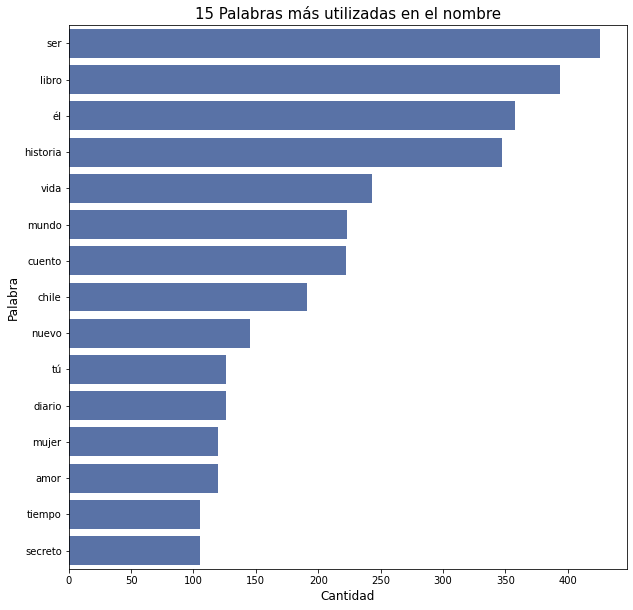

In [24]:
fig = plt.subplots(figsize=(10, 10))
sns.barplot(y=most_common_words, x=most_common_values, color="#4C6EB3")
plt.title("15 Palabras más utilizadas en el nombre", fontsize=15)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Palabra", fontsize=12)
plt.savefig("plots/most_common_words_in_names.png", bbox_inches="tight", facecolor="#e3e3e3",
			pad_inches=0.3, transparent=False)
plt.show()

### Common Words on top 500 books

In [25]:
import re

In [26]:
rating = []
raters = []

for index in range(df.shape[0]):
	star5 = int(re.search(r"\((.*?)\)", df["five_stars"].iloc[index]).group(1))
	star4 = int(re.search(r"\((.*?)\)", df["four_stars"].iloc[index]).group(1))
	star3 = int(re.search(r"\((.*?)\)", df["three_stars"].iloc[index]).group(1))
	star2 = int(re.search(r"\((.*?)\)", df["two_stars"].iloc[index]).group(1))
	star1 = int(re.search(r"\((.*?)\)", df["one_star"].iloc[index]).group(1))

	numerator = 5 * star5 + 4 * star4 + 3 * star3 + 2 * star2 + star1
	denominator = star5 + star4 + star3 + star2 + star1

	if denominator == 0:
		rating.append(0)
	else:
		rating.append(numerator / denominator)

	raters.append(denominator)

df.insert(18, "rating", rating)
df.insert(19, "raters", raters)

In [27]:
mean_rating = 0
for row in df["rating"]:
	mean_rating += row

mean_rating = mean_rating / df.shape[0]

max_raters = max(df["raters"])

def bayesian_rating(rating, raters):
	return rating * (raters / max_raters) + (1 - (raters / max_raters)) * mean_rating

In [28]:
bayesian_ratings = [
	bayesian_rating(df["rating"].iloc[i], df["raters"].iloc[i]) for i in range(df.shape[0])
]

df.insert(20, "bayesian_rating", bayesian_ratings)

In [29]:
df.iloc[10]

name                                             nosotros en la luna
author                                                  alice kellen
editorial                                                    planeta
price                                                          15510
review             tras el exito de deja que ocurra vuelve alice ...
description        formatolibro fisico autor alice kellen editori...
five_stars                                                 91% (204)
four_stars                                                   7% (16)
three_stars                                                   0% (0)
two_stars                                                     1% (2)
one_star                                                      0% (1)
link               https://www.buscalibre.cl/libro-nosotros-en-la...
website                                                            1
book_format                                                   fisico
book_category                     

In [30]:
best_products_words = [
	word for row in df.sort_values(by="bayesian_rating", ascending=False)["name_cleaned"][0:500]
	for word in row.split()
]

In [31]:
counts = Counter(best_products_words)
counts.most_common()

most_common_words = [word[0] for word in counts.most_common()[0:15]]
most_common_values = [word[1] for word in counts.most_common()[0:15]]

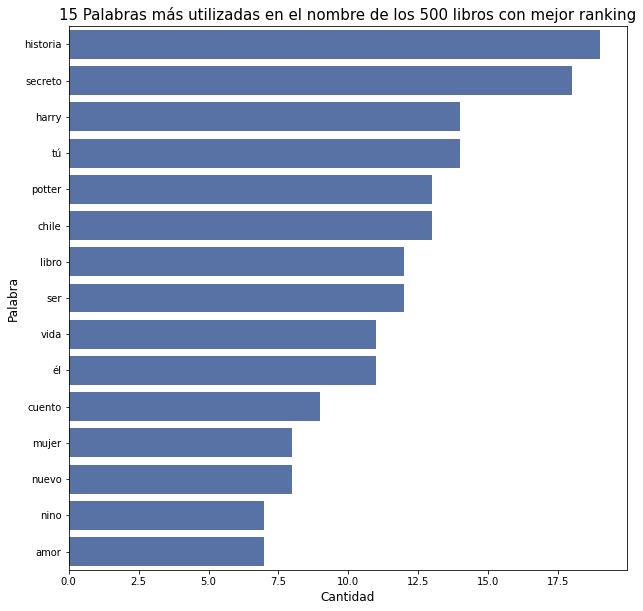

In [32]:
fig = plt.subplots(figsize=(10, 10))
sns.barplot(y=most_common_words, x=most_common_values, color="#4C6EB3")
plt.title("15 Palabras más utilizadas en el nombre de los 500 libros con mejor ranking",
		  fontsize=15)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Palabra", fontsize=12)
plt.savefig("plots/most_common_words_in_names_best.png", bbox_inches="tight", facecolor="#e3e3e3",
			pad_inches=0.3, transparent=False)
plt.show()

### Common words on 500 most expensive books

In [33]:
expensives_common_words = [
	word for row in df.sort_values(by="price", ascending=False)["name_cleaned"][0:500]
	for word in row.split()
]

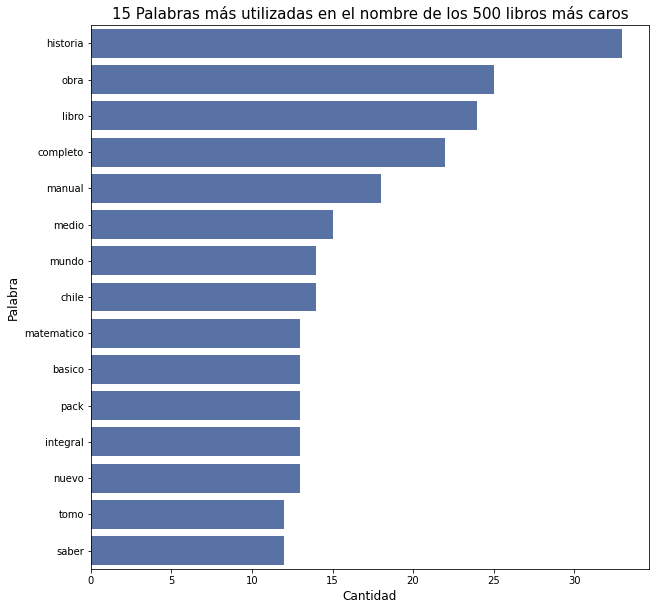

In [34]:
counts = Counter(expensives_common_words)
counts.most_common()

most_common_words = [word[0] for word in counts.most_common()[0:15]]
most_common_values = [word[1] for word in counts.most_common()[0:15]]

fig = plt.subplots(figsize=(10, 10))
sns.barplot(y=most_common_words, x=most_common_values, color="#4C6EB3")
plt.title("15 Palabras más utilizadas en el nombre de los 500 libros más caros",
		  fontsize=15)
plt.xlabel("Cantidad", fontsize=12)
plt.ylabel("Palabra", fontsize=12)
plt.savefig("plots/most_common_words_in_names_expensives.png", bbox_inches="tight",
			facecolor="#e3e3e3", pad_inches=0.3, transparent=False)
plt.show()

## Author

In [35]:
female_names = pd.read_csv("aux_names/females.csv")["nombre"]
male_names = pd.read_csv("aux_names/males.csv")["nombre"]

female_names.dropna(inplace=True)
male_names.dropna(inplace=True)

all_female_names = [name.lower().split()[0] for name in female_names]
all_male_names = [name.lower().split()[0] for name in male_names]

repeated_males = ["julia", "angeles", "dominique", "maria", "andrea", "karen",
				  "rosario", "iris", "loreto", "consuelo", "carol", "karin", "vivian", "denis",
				  "ariel", "pilar", "kim", "lilian", "surya", "leonor", "montserrat", "guadalupe",
				  "ashley", "camille", "mercedes", "trinidad", "harriet", "paz", "jane", "simone"]

repeated_females = ["robin", "joan", "juan", "nino", "chris", "alex", "erin", "gabriele",
					"willy", "jesus", "hermogenes", "noah"]

for name in repeated_females:
	all_female_names.remove(name)

for name in repeated_males:
	all_male_names.remove(name)

In [36]:
female_author = []
male_author = []

for row in df["author"]:
	if row.split()[0] in all_female_names:
		female_author.append(1)
	else:
		female_author.append(0)

for row in df["author"]:
	if row.split()[0] in all_male_names:
		male_author.append(1)
	else:
		male_author.append(0)

df.insert(21, "female_author", female_author)
df.insert(22, "male_author", male_author)

In [37]:
females_data = pd.concat([
	df[(df["female_author"] == 1) & (df["male_author"] == 0)]["bayesian_rating"].copy(),
	pd.Series(data="female", index=df[(df["female_author"] == 1) & (df["male_author"] == 0)].index)
], axis=1)

In [53]:
females_data = pd.concat([
	df[(df["female_author"] == 1) & (df["male_author"] == 0)]["bayesian_rating"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 1) & (df["male_author"] == 0)].index,
		data="Mujeres", name="género"
	)
], axis=1)
females_data.reset_index(drop=True, inplace=True)

males_data = pd.concat([
	df[(df["female_author"] == 0) & (df["male_author"] == 1)]["bayesian_rating"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 0) & (df["male_author"] == 1)].index,
		data="Hombres", name="género"
	)
], axis=1)
males_data.reset_index(drop=True, inplace=True)

nas_data = pd.concat([
	df[(df["female_author"] == 0) & (df["male_author"] == 0)]["bayesian_rating"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 0) & (df["male_author"] == 0)].index,
		data="No Especificado", name="género"
	)
], axis=1)
nas_data.reset_index(drop=True, inplace=True)

both_data = pd.concat([
	df[(df["female_author"] == 1) & (df["male_author"] == 1)]["bayesian_rating"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 1) & (df["male_author"] == 1)].index,
		data="No Especificado", name="género"
	)
], axis=1)
both_data.reset_index(drop=True, inplace=True)

plot_data = pd.concat([females_data, males_data, nas_data, both_data])

del females_data, males_data

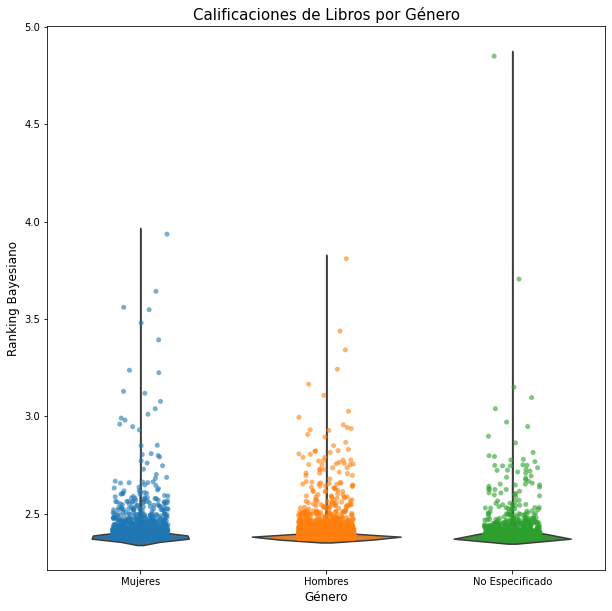

In [54]:
fig = plt.subplots(figsize=(10, 10))
sns.violinplot(y="bayesian_rating", x="género", data=plot_data)
sns.stripplot(y="bayesian_rating", x="género", data=plot_data, alpha=0.6, jitter=0.15)
plt.title("Calificaciones de Libros por Género", fontsize=15)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Ranking Bayesiano", fontsize=12)
plt.savefig("plots/ranking_per_genre.png", bbox_inches="tight",
			facecolor="#e3e3e3", pad_inches=0.3, transparent=False)
plt.show()

In [55]:
females_data = pd.concat([
	df[(df["female_author"] == 1) & (df["male_author"] == 0)]["price"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 1) & (df["male_author"] == 0)].index,
		data="Mujeres", name="género"
	)
], axis=1)
females_data.reset_index(drop=True, inplace=True)

males_data = pd.concat([
	df[(df["female_author"] == 0) & (df["male_author"] == 1)]["price"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 0) & (df["male_author"] == 1)].index,
		data="Hombres", name="género"
	)
], axis=1)
males_data.reset_index(drop=True, inplace=True)

nas_data = pd.concat([
	df[(df["female_author"] == 0) & (df["male_author"] == 0)]["price"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 0) & (df["male_author"] == 0)].index,
		data="No Especificado", name="género"
	)
], axis=1)
nas_data.reset_index(drop=True, inplace=True)

both_data = pd.concat([
	df[(df["female_author"] == 1) & (df["male_author"] == 1)]["price"].copy(),
	pd.Series(
		index=df[(df["female_author"] == 1) & (df["male_author"] == 1)].index,
		data="No Especificado", name="género"
	)
], axis=1)
both_data.reset_index(drop=True, inplace=True)

plot_data = pd.concat([females_data, males_data, nas_data, both_data])

del females_data, males_data

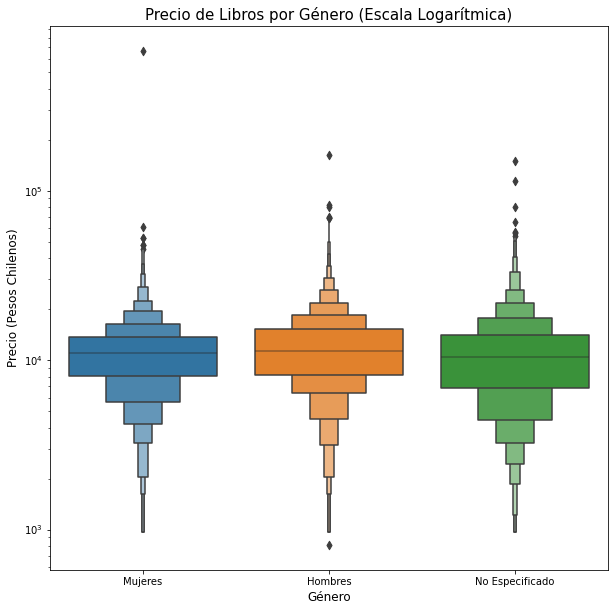

In [71]:
fig = plt.subplots(figsize=(10, 10))
sns.boxenplot(y="price", x="género", data=plot_data)
# sns.stripplot(y="price", x="género", data=plot_data, alpha=0.1, jitter=0.3, color="black")
plt.title("Precio de Libros por Género (Escala Logarítmica)", fontsize=15)
plt.xlabel("Género", fontsize=12)
plt.ylabel("Precio (Pesos Chilenos)", fontsize=12)
plt.yscale("log")
plt.savefig("plots/price_per_genre.png", bbox_inches="tight",
			facecolor="#e3e3e3", pad_inches=0.3, transparent=False)
plt.show()